<a href="https://colab.research.google.com/github/brahma102/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Importing the required packages





In [ ]:
# importing libraries
import pandas as pd               # for data manipulation
import numpy as np                # for mathemathical operations and linear algebra
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for data visualization 
import plotly.express as px       # for data visualization
from sklearn.impute import SimpleImputer


# **Play Store Data**
## Read the dataset into dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading dataset
path  = "/content/drive/MyDrive/Colab Notebooks/Capstone Project 1/"
df1 = pd.read_csv(path + "Play Store Data.csv")
df2 = pd.read_csv(path + "User Reviews.csv")

In [ ]:
# displaying the head or the first 10 rows of the dataframe
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
# look at the random 5 records in the apps dataframe
df1.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7062,Südtirol2Go,MAPS_AND_NAVIGATION,3.3,555,31M,"50,000+",Free,0,Everyone,Maps & Navigation,"December 20, 2017",2.1.2,4.0 and up
10154,EZ-VPNGate,TOOLS,4.3,36,12M,"5,000+",Free,0,Everyone,Tools,"August 21, 2017",1.0.7,4.0.3 and up
1708,Toon Blast,GAME,4.7,1351068,Varies with device,"10,000,000+",Free,0,Everyone,Puzzle,"July 30, 2018",3196,4.1 and up
4253,J - Style Pro,HEALTH_AND_FITNESS,2.3,74,2.6M,"10,000+",Free,0,Everyone,Health & Fitness,"January 20, 2016",1.1,4.3 and up
10381,Gun Disassembly 2,FAMILY,4.1,26347,48M,"1,000,000+",Free,0,Everyone 10+,Entertainment,"September 15, 2017",14.0.1,2.2 and up


In [ ]:
#Informatation of app dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Description of App Dataset columns
App : The name of the app

Category : The category of the app

Rating : The rating of the app in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The number of installs of the app

Type : The type of the app (Free/Paid)

The price of the app (0 if it is Free)

Content Rating :The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app

In [ ]:
# type of Category
x=df1['Category'].unique()
print('Total no of category of app present in playstore is:-',len(x))

Total no of category of app present in playstore is:- 34


By diagnosing the data frame, we know that:

There are 13 columns of properties with 10841 rows of data.

Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'

Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

Values of column 'Price' are strings representing price with symbol '$'.

Hence, we will need to do some data cleaning.

## Data cleaning

In [ ]:
#Convert install coloum string to int
def convert_int(x):
    x=x+','+'+'+'M'+'k'+'$'  
    x=x.replace(',','')
    x=x.replace('+','')
    x=x.replace('M','')
    x=x.replace('k','')
    x=x.replace('$','')
    if x=='Free' or x=='Varies with device'or x=='Everyone':
        x=0
    #elif x==
    else:
        x=eval(x)
    
 
    return x
df1['Installs']=df1['Installs'].apply(convert_int)

In [ ]:
#convert size obj to int and price
df1['Size_int']=df1['Size'].apply(convert_int)
df1['Price']=df1['Price'].apply(convert_int)
df1['Reviews']=df1['Reviews'].apply(convert_int)

In [ ]:
# Remove wich app reating is more than 5
r=df1[df1['Rating']>5].index 
r
df1=df1.drop(r)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_int        10840 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# check on null values
df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Size_int             0
dtype: int64

Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence, we decided to replace the null values with median of overall 'Rating' values.

median=In statistics and probability theory, the median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution. For a data set, it may be thought of as "the middle" value

In [ ]:
x=df1['Rating'].median()
x
df1['Rating']=df1['Rating'].fillna(x)

In [ ]:
df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Size_int          0
dtype: int64

In [ ]:
#Remove the app which has contain no type
y=df1[df1['Type'].isna()].index
df1=df1.drop(index=y)
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Size_int          0
dtype: int64

In [ ]:
#Based on higest riview we creat the data set and change the 
df2=pd.DataFrame(df1)
df2.sort_values(by='Reviews',ascending=False, inplace=True)

df2=df2.drop_duplicates(subset=['App'])
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,1000000000,Free,0.00,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1000000000,Free,0.00,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,1000000000,Free,0.00,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1000000000,Free,0.00,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0.0
1879,Clash of Clans,GAME,4.6,44893888.0,98M,100000000,Free,0.00,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Doctors Care,MEDICAL,4.3,0.0,25M,10,Free,0.00,Everyone,Medical,"July 24, 2018",2.0.0 (35717),4.4 and up,25.0
2439,Weill Cornell Medicine,MEDICAL,4.3,0.0,19M,50,Free,0.00,Everyone,Medical,"July 16, 2018",1.0.10,5.0 and up,19.0
2438,Pediatric Emergency Guide,MEDICAL,4.3,0.0,3.8M,100,Free,0.00,Everyone,Medical,"July 9, 2018",3.1.1,4.4 and up,3.8
2437,Dare EMS Protocols,MEDICAL,4.3,0.0,20M,10,Free,0.00,Everyone 10+,Medical,"July 26, 2018",1.8.3,4.1 and up,20.0


In [ ]:
# check on statistical information of the dataframe
df2.describe()

,Rating,Reviews,Installs,Price,Size_int
count,9658.000000,9.658000e+03,9.658000e+03,9658.000000,9658.000000
mean,4.192452,2.168266e+05,7.798978e+06,1.097344,32.420553
std,0.496080,1.831524e+06,5.377245e+07,16.852487,96.488804
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,3.400000
50%,4.300000,9.695000e+02,1.000000e+05,0.000000,10.000000
75%,4.500000,2.945775e+04,1.000000e+06,0.000000,28.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,1020.000000


# Data visualization

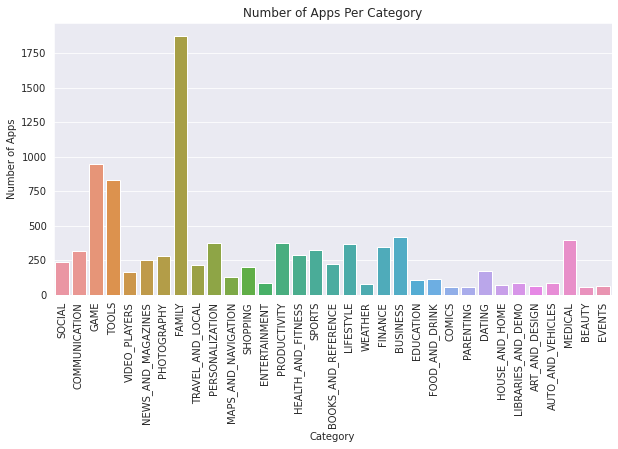

In [ ]:
# get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df2)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

In [ ]:
#Count total no of instalation
users=df2.groupby(['Category'])['Installs'].sum().reset_index()
users

,Category,Installs
0,ART_AND_DESIGN,113238100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1665969576
4,BUSINESS,697164865
5,COMICS,44981150
6,COMMUNICATION,11038276251
7,DATING,140925107
8,EDUCATION,188952000
9,ENTERTAINMENT,989660000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 2544 to 8019
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   float64
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9650 non-null   object 
 12  Android Ver     9656 non-null   object 
 13  Size_int        9658 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.4+ MB


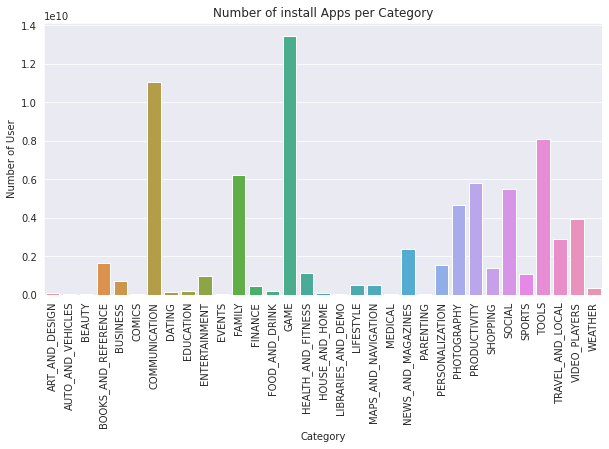

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(x='Category',y='Installs',data=users)
plt.title('Number of install Apps per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of User')
plt.show()

As for the above graph we colclude that most user showing there intrest in Gaming app and after game people show there intrest in communication apps.
The highest install app is Game app and communicatation app is in second

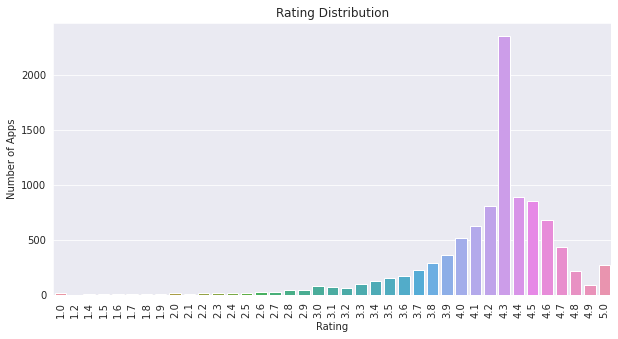

In [ ]:
# show the distribution of rating
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df2)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

In [ ]:
#Ratin as compare to no of installs ,as for size,as for price and as for review
rating=df2.groupby(['Rating']).sum().reset_index()
rating.head()

,Rating,Reviews,Installs,Price,Size_int
0,1.0,28.0,5170,4.48,228.8
1,1.2,44.0,1000,0.00,27.0
2,1.4,98.0,7000,0.00,20.2
3,1.5,61.0,1105,0.00,54.0
4,1.6,691.0,152000,0.00,64.6


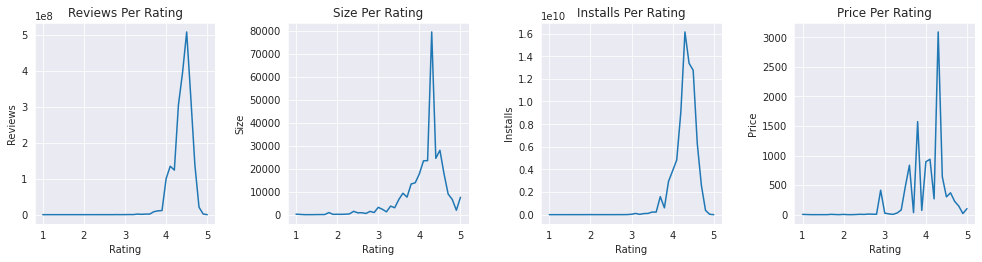

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating['Rating'], rating['Reviews'])
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating['Rating'], rating['Size_int'] )
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating['Rating'], rating['Installs'] )
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating['Rating'], rating['Price'] )
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()

From the above graphs, we found that most of the apps whose rating range is in between 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



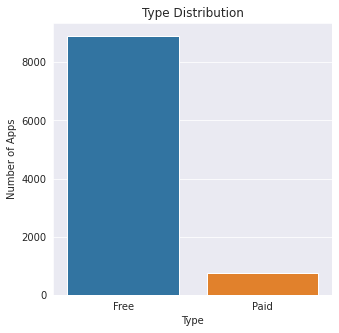

In [ ]:
# application type distribution
#Here we use count plot because here we count a paricular coloum comparision
plt.figure(figsize=(5, 5))
sns.countplot(df2['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

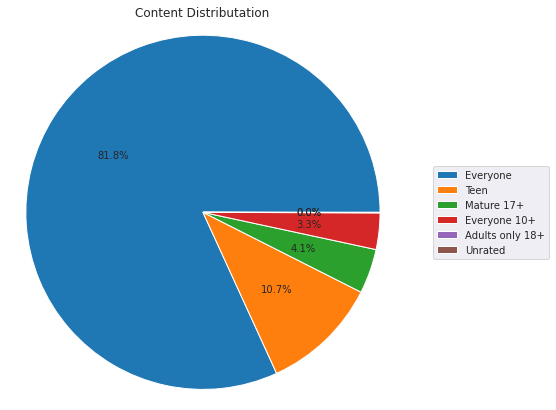

In [ ]:
 
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

number_of_apps = df2['Content Rating'].value_counts()

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Content Distributation')
plt.show()

From the plot we can imply that majority of the apps in the Play Store are Free apps.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
10798,Word Search Tab 1 FR,FAMILY,4.3,0.0,1020k,50,Paid,1.04,Everyone,Puzzle,"February 6, 2012",1.1,3.0 and up,1020.0


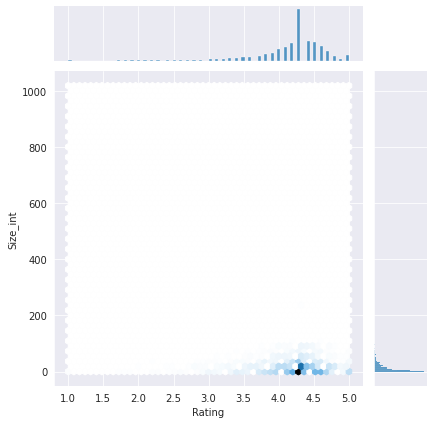

In [ ]:
sns.jointplot(y ='Size_int', x ='Rating', data = df2, kind ='hex')
max=df2[df2['Size_int']==df2['Size_int'].max()]
max

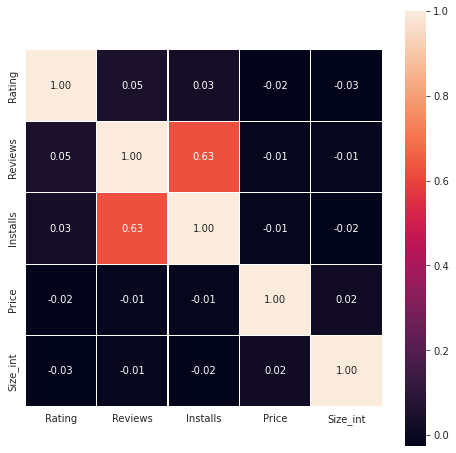

In [ ]:
#Corilation with each catagory to other catagory by using heat map
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df2.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

Frome the above heat map we found that as for instalation of app incress reviews of the app also incress..So the highest used app incress the review